In [1]:
from ml.EnsembleLearning import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle

In [2]:
column_name = [
    'age', 'job', 'marital', 'education', 'default',
    'balance', 'housing', 'loan', 'contact',
    'day', 'month', 'duration', 'campaign',
    'pdays', 'previous', 'poutcome', 'label',
]
df = pd.read_csv('./data/bank/train.csv', names=column_name)
df['label'] = df['label'].map({'yes': 1, 'no':-1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,41,services,married,secondary,no,0,yes,no,unknown,5,may,114,2,-1,0,unknown,-1
1,48,blue-collar,single,secondary,no,312,yes,yes,cellular,3,feb,369,2,-1,0,unknown,-1
2,55,technician,married,secondary,no,1938,no,yes,cellular,18,aug,193,1,386,3,success,1
3,54,admin.,married,tertiary,no,59,yes,no,cellular,10,jul,268,1,-1,0,unknown,-1
4,34,management,single,tertiary,no,2646,no,no,cellular,14,apr,142,1,-1,0,unknown,1


In [3]:
df_test = pd.read_csv('./data/bank/test.csv', names=column_name)
df_test['label'] = df_test['label'].map({'yes': 1, 'no':-1})
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,41,management,single,secondary,no,764,no,no,cellular,12,jun,230,2,-1,0,unknown,-1
1,39,blue-collar,married,secondary,no,49,yes,no,cellular,14,may,566,1,370,2,failure,-1
2,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown,-1
3,31,entrepreneur,single,tertiary,no,247,yes,yes,unknown,2,jun,273,1,-1,0,unknown,-1
4,26,student,single,unknown,no,2020,no,no,telephone,28,jan,42,3,-1,0,unknown,-1


In [4]:
numerical_attributes = {
    'age': 'median',
    'balance': 'median',
    'day': 'median',
    'duration': 'median',
    'campaign': 'median',
    'pdays': 'median',
    'previous': 'median',
}

In [5]:
report = {
    'training': {},
    'test': {},
}

T = 500
max_features = [2, 4, 6]
models = [RandomForestClassifier() for _ in max_features]
start = time.time()
for idx, max_feature in enumerate([2, 4, 6]):
    models[idx].fit(df, numerical_attributes=numerical_attributes, T=T, replace=True, max_features=max_feature, label='label')
print(f'Time to execute: {time.time() - start}s')

Time to execute: 20713.956928014755s


In [25]:
report = {
    2: {
        'training': [],
        'test': [],
    },
    4: {
        'training': [],
        'test': [],
    },
    6: {
        'training': [],
        'test': [],
    },
}

In [24]:
models

In [ ]:
for t in range(1, T+1):
    print(f'\r {t/5.0}%', end='')
    report[6]['training'].append(1-sum(models[2].predict_batch(df, T=t) == df['label'])/len(df))
    report[6]['test'].append(1-sum(models[2].predict_batch(df_test, T=t) == df_test['label'])/len(df_test))

 29.4%

In [23]:
len(report[4]['test'])

0

In [16]:
with open('./rf3.report', 'wb') as f:
    pickle.dump(report, f)

In [17]:
x = np.arange(269)

In [ ]:
plt.plot(x, report[2]['training'], label='training')
plt.plot(x, report[2]['test'], label='test')
plt.xlabel('Trees')
plt.ylabel('Error')
plt.title('Random Forest with feature subset = 2')
plt.legend()
plt.show()

In [ ]:
plt.plot(x, report[4]['training'], label='training')
plt.plot(x, report[4]['test'], label='test')
plt.xlabel('Trees')
plt.ylabel('Error')
plt.title('Random Forest with feature subset = 2')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (269,) and (0,)

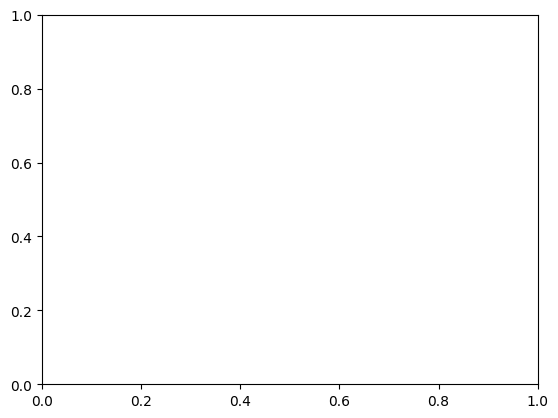

In [18]:
plt.plot(x, report[6]['training'], label='training')
plt.plot(x, report[6]['test'], label='test')
plt.xlabel('Trees')
plt.ylabel('Error')
plt.title('Random Forest with feature subset = 2')
plt.legend()
plt.show()